# Hepatitis : Loading the Dataset and Initial Exploration

In [1]:
import pandas as pd #used for data manipulation and analysis. It provides data structures like DataFrames.
import numpy as np # numerical computations in Python. It provides support for arrays, matrices, and mathematical functions.
import matplotlib.pyplot as plt #used for creating static, interactive, and animated visualizations.
import seaborn as sns # a statistical data visualization library built on Matplotlib. It provides a high-level interface for drawing attractive graphs.
#scikit-learn library, which is a popular tool for machine learning in Python:
from sklearn.model_selection import train_test_split #Used to split datasets into training and testing subsets for model evaluation.
from sklearn.preprocessing import StandardScaler, OneHotEncoder # A preprocessing tool to standardize features by removing the mean and scaling to unit variance.
#Used to convert categorical variables into a one-hot encoded numeric array.
from sklearn.impute import SimpleImputer #Used to handle missing values by imputing them (e.g., replacing NaN with mean/median/mode).
from sklearn.compose import ColumnTransformer #Applies different transformations to different columns in a dataset (e.g., scaling numerical columns and one-hot encoding categorical columns).
from sklearn.pipeline import Pipeline #Chains multiple data processing steps (e.g., imputation, scaling, encoding) into a single object for streamlined workflow.

ModuleNotFoundError: No module named 'pandas'

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

In [3]:
cost_df = pd.read_csv('hepatitis.cost', sep=r'\s+')
delay_df = pd.read_csv('hepatitis.delay', sep=r'\s+')
expense_df = pd.read_csv('hepatitis.expense', sep=r'\s+')
group_df = pd.read_csv('hepatitis.group', sep=r'\s+')

In [ ]:
file_path = r"C:\Users\nemo-\Documents\hepatitis.data"
column_names = ["Class", "Age", "Sex", "Steroid", "Antivirals", "Fatigue", "Malaise", 
                "Anorexia", "Liver_Big", "Liver_Firm", "Spleen_Palpable", "Spiders", 
                "Ascites", "Varices", "Bilirubin", "Alk_Phosphate", "SGOT", "Albumin", 
                "Protime", "Histology"]


In [ ]:
#treats the string ? as a missing value (NaN)
df = pd.read_csv(file_path, names=column_names, na_values='?')

In [8]:
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
   Class  Age  Sex  Steroid  Antivirals  Fatigue  Malaise  Anorexia  Liver_Big  Liver_Firm  Spleen_Palpable  Spiders  Ascites  Varices  Bilirubin  Alk_Phosphate   SGOT  Albumin  Protime  Histology
0      2   30    2      1.0           2      2.0      2.0       2.0        1.0         2.0              2.0      2.0      2.0      2.0        1.0           85.0   18.0      4.0      NaN          1
1      2   50    1      1.0           2      1.0      2.0       2.0        1.0         2.0              2.0      2.0      2.0      2.0        0.9          135.0   42.0      3.5      NaN          1
2      2   78    1      2.0           2      1.0      2.0       2.0        2.0         2.0              2.0      2.0      2.0      2.0        0.7           96.0   32.0      4.0      NaN          1
3      2   31    1      NaN           1      2.0      2.0       2.0        2.0         2.0              2.0      2.0      2.0      2.0        0.7           46.0   52.0      4.0     80

In [13]:
print("\nDataset info:")
df.info()


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Class            155 non-null    int64  
 1   Age              155 non-null    int64  
 2   Sex              155 non-null    int64  
 3   Steroid          154 non-null    float64
 4   Antivirals       155 non-null    int64  
 5   Fatigue          154 non-null    float64
 6   Malaise          154 non-null    float64
 7   Anorexia         154 non-null    float64
 8   Liver_Big        145 non-null    float64
 9   Liver_Firm       144 non-null    float64
 10  Spleen_Palpable  150 non-null    float64
 11  Spiders          150 non-null    float64
 12  Ascites          150 non-null    float64
 13  Varices          150 non-null    float64
 14  Bilirubin        149 non-null    float64
 15  Alk_Phosphate    126 non-null    float64
 16  SGOT             151 non-null    float64
 17  A

In [ ]:
#Generates descriptive statistics for all numerical columns in the DataFrame.
print("\nSummary statistics:")
print(df.describe())


Summary statistics:
            Class         Age         Sex     Steroid  Antivirals     Fatigue     Malaise    Anorexia   Liver_Big  Liver_Firm  Spleen_Palpable     Spiders     Ascites    Varices   Bilirubin  Alk_Phosphate       SGOT     Albumin     Protime   Histology
count  155.000000  155.000000  155.000000  154.000000  155.000000  154.000000  154.000000  154.000000  145.000000  144.000000        150.00000  150.000000  150.000000  150.00000  149.000000     126.000000  151.00000  139.000000   88.000000  155.000000
mean     1.793548   41.200000    1.103226    1.506494    1.845161    1.350649    1.603896    1.792208    1.827586    1.583333          1.80000    1.660000    1.866667    1.88000    1.427517     105.325397   85.89404    3.817266   61.852273    1.451613
std      0.406070   12.565878    0.305240    0.501589    0.362923    0.478730    0.490682    0.407051    0.379049    0.494727          0.40134    0.475296    0.341073    0.32605    1.212149      51.508109   89.65089    0.65

In [15]:
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
Class               0
Age                 0
Sex                 0
Steroid             1
Antivirals          0
Fatigue             1
Malaise             1
Anorexia            1
Liver_Big          10
Liver_Firm         11
Spleen_Palpable     5
Spiders             5
Ascites             5
Varices             5
Bilirubin           6
Alk_Phosphate      29
SGOT                4
Albumin            16
Protime            67
Histology           0
dtype: int64


In [16]:
print("\nTarget variable (Class) distribution:")
print(df["Class"].value_counts())
print(df["Class"].value_counts(normalize=True))


Target variable (Class) distribution:
Class
2    123
1     32
Name: count, dtype: int64
Class
2    0.793548
1    0.206452
Name: proportion, dtype: float64


# Data Cleaning and Missing Value Handling

In [ ]:
#(Imputation (Median)) handels missing values in numerical columns, filling them with the median value of each column.
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
numerical_imputer = SimpleImputer(strategy='median')
df[numerical_features] = numerical_imputer.fit_transform(df[numerical_features])

In [18]:
# Check if there are any categorical features
print("Columns with 'object' data type:")
print(df.select_dtypes(include=['object']).columns.tolist())

# Also check all column types
print("\nData types for all columns:")
print(df.dtypes)


Columns with 'object' data type:
[]

Data types for all columns:
Class              float64
Age                float64
Sex                float64
Steroid            float64
Antivirals         float64
Fatigue            float64
Malaise            float64
Anorexia           float64
Liver_Big          float64
Liver_Firm         float64
Spleen_Palpable    float64
Spiders            float64
Ascites            float64
Varices            float64
Bilirubin          float64
Alk_Phosphate      float64
SGOT               float64
Albumin            float64
Protime            float64
Histology          float64
dtype: object


In [ ]:
# Define binary categorical features explicitly (the features contains yes or no , m or f)
binary_cols = ['Sex', 'Steroid', 'Antivirals', 'Fatigue', 'Malaise', 'Anorexia',
              'Liver_Big', 'Liver_Firm', 'Spleen_Palpable', 'Spiders', 'Ascites',
              'Varices', 'Histology']

# Print how many values are missing in each binary column
print("\nMissing values in binary columns:")
for col in binary_cols:
    if col in df.columns:
        print(f"{col}: {df[col].isnull().sum()} missing values")


Missing values in binary columns:
Sex: 0 missing values
Steroid: 0 missing values
Antivirals: 0 missing values
Fatigue: 0 missing values
Malaise: 0 missing values
Anorexia: 0 missing values
Liver_Big: 0 missing values
Liver_Firm: 0 missing values
Spleen_Palpable: 0 missing values
Spiders: 0 missing values
Ascites: 0 missing values
Varices: 0 missing values
Histology: 0 missing values


In [ ]:
# Handle imputation for binary columns one by one
#(imputed binary columns) by filling them with the most frequent value (mode)
for col in binary_cols:
    if col in df.columns and df[col].isnull().sum() > 0:
        # Create imputer for this specific column
        imputer = SimpleImputer(strategy='most_frequent')
        # Reshape to 2D array as required by SimpleImputer
        df[col] = imputer.fit_transform(df[col].values.reshape(-1, 1))
        print(f"Imputed missing values in {col}")

In [21]:
# Verify no missing values remain
print("\nRemaining missing values after imputation:")
print(df.isnull().sum()[df.isnull().sum() > 0])


Remaining missing values after imputation:
Series([], dtype: int64)


In [22]:
print("\nMissing values after imputation:")
print(df.isnull().sum())


Missing values after imputation:
Class              0
Age                0
Sex                0
Steroid            0
Antivirals         0
Fatigue            0
Malaise            0
Anorexia           0
Liver_Big          0
Liver_Firm         0
Spleen_Palpable    0
Spiders            0
Ascites            0
Varices            0
Bilirubin          0
Alk_Phosphate      0
SGOT               0
Albumin            0
Protime            0
Histology          0
dtype: int64


# Exploratory Data Analysis

Available matplotlib styles:
['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


Text(0.5, 0.98, 'Hepatitis Dataset Exploration')

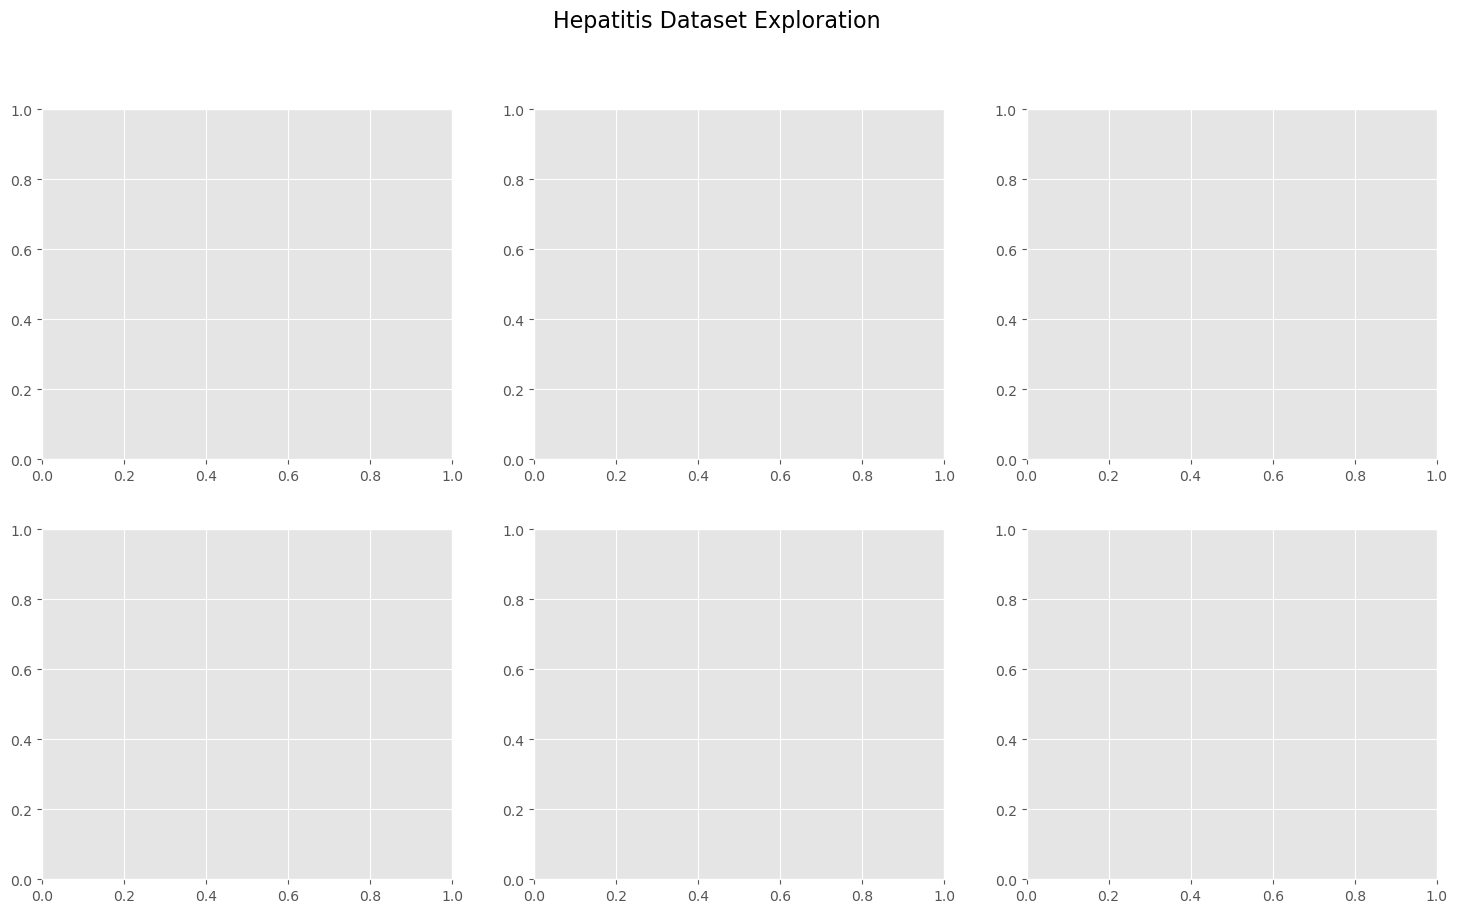

In [23]:
# Check available styles first
print("Available matplotlib styles:")
print(plt.style.available)

# Use a modern style that's widely available
plt.style.use('ggplot')  # Alternative options: 'seaborn', 'fivethirtyeight', etc.

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
fig.suptitle('Hepatitis Dataset Exploration', fontsize=16)

In [24]:
sns.histplot(data=df, x="Age", hue="Class", kde=True, ax=axes[0, 0])
sns.histplot(data=df, x="Bilirubin", hue="Class", kde=True, ax=axes[0, 1])
sns.histplot(data=df, x="Alk_Phosphate", hue="Class", kde=True, ax=axes[0, 2])
sns.histplot(data=df, x="SGOT", hue="Class", kde=True, ax=axes[1, 0])
sns.histplot(data=df, x="Albumin", hue="Class", kde=True, ax=axes[1, 1])
sns.histplot(data=df, x="Protime", hue="Class", kde=True, ax=axes[1, 2])

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

<Figure size 640x480 with 0 Axes>

# Correlation Heatmap of numerical features


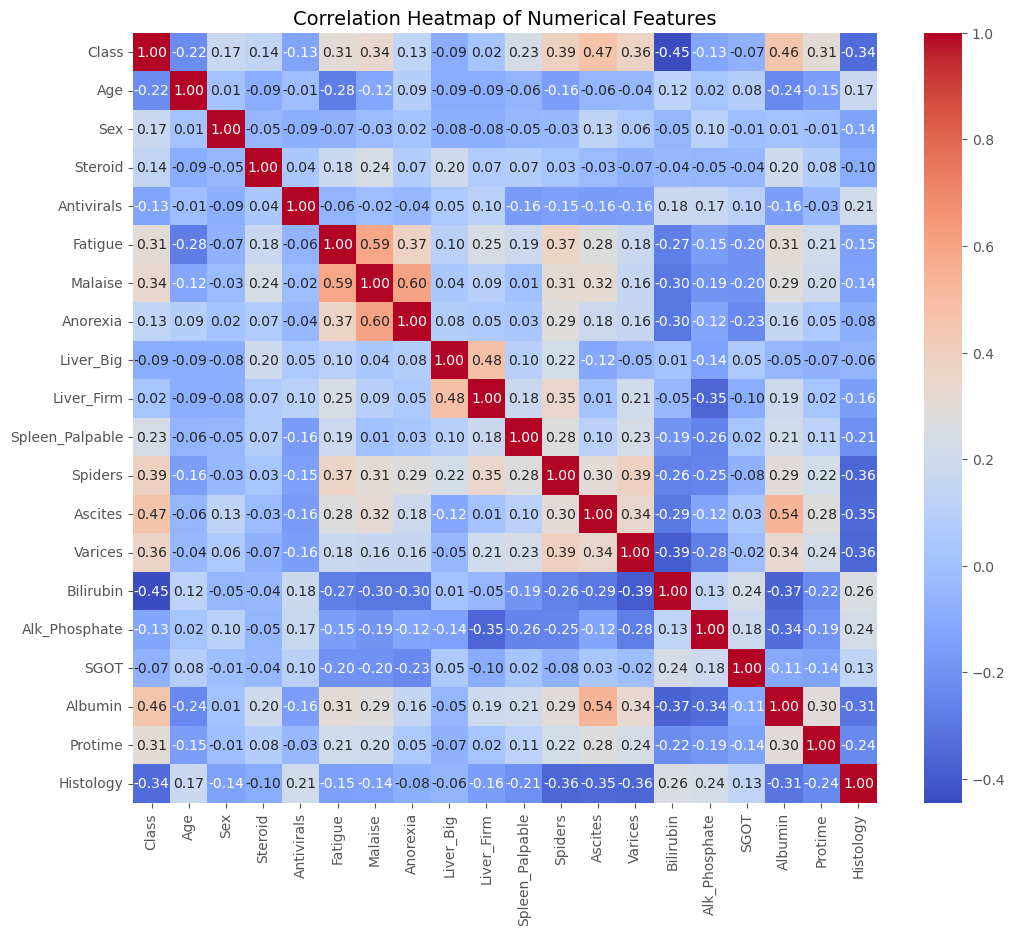

In [ ]:
#generates a correlation heatmap to visualize relationships between numerical features in your dataset.
plt.figure(figsize=(12, 10))
correlation_matrix = df.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features', fontsize=14)
plt.show()

# Interpretation Guide : 
# +1.00: Perfect positive correlation (as A increases, B increases)
# -1.00: Perfect negative correlation (as A increases, B decreases)
# 0.00: No linear relationship

# Thresholds:
# > 0.7 or < -0.7: Strong correlation (potential redundancy)
# 0.3-0.7 or -0.3--0.7: Moderate correlation
# < 0.3 and > -0.3: Weak/no correlation

# vertical stack of count plots to visualize the distribution of categorical/binary features across the target variable

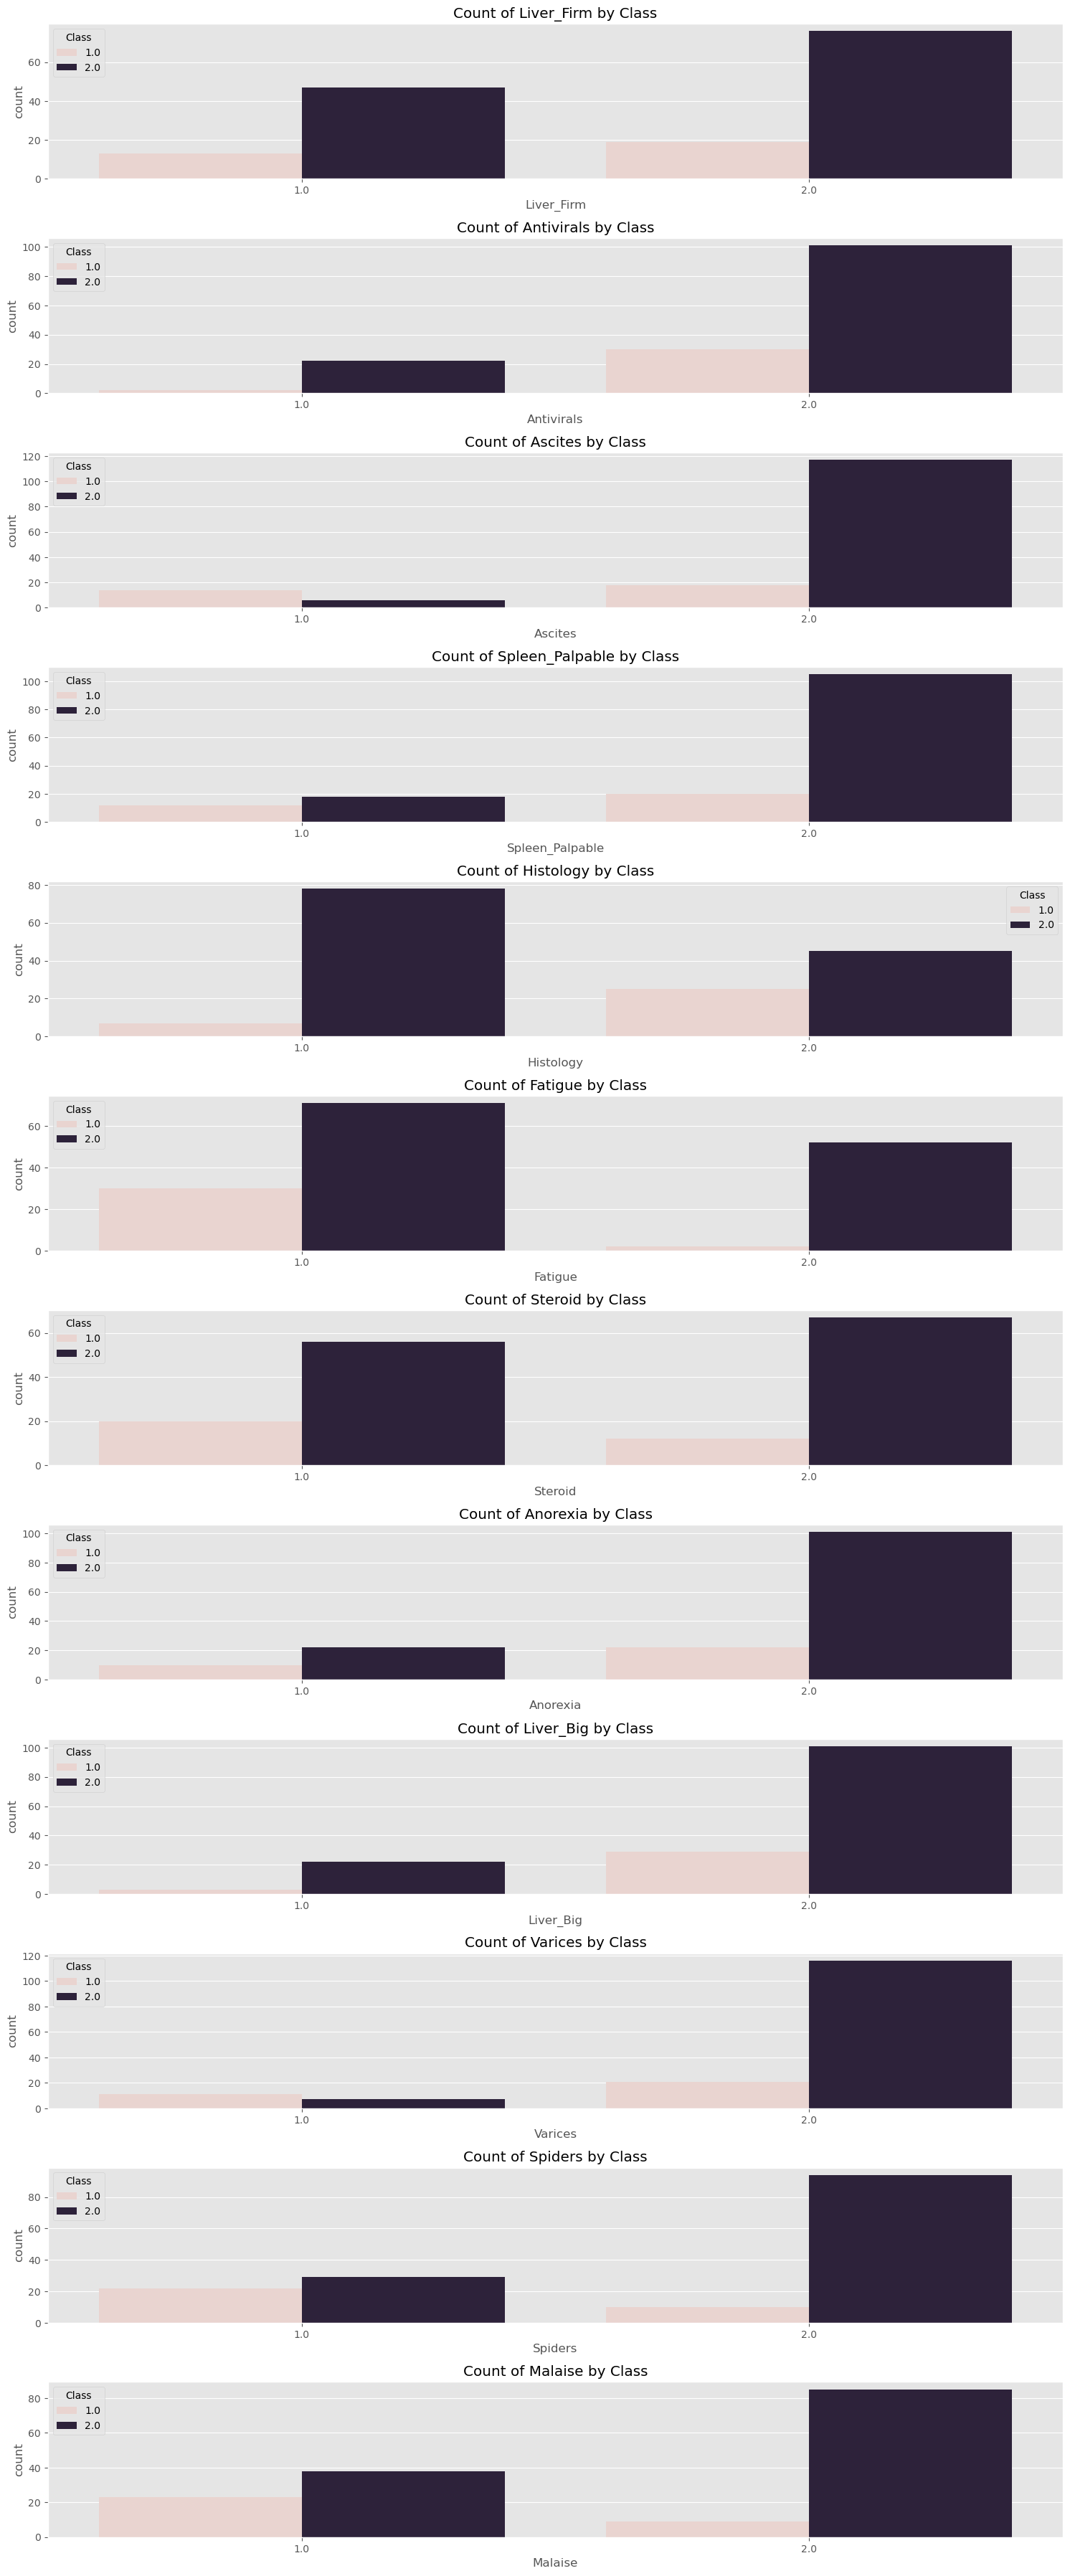

In [27]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols.extend(['Steroid', 'Antivirals', 'Fatigue', 'Malaise', 'Anorexia', 
                         'Liver_Big', 'Liver_Firm', 'Spleen_Palpable', 'Spiders', 
                         'Ascites', 'Varices', 'Histology'])
categorical_cols = list(set(categorical_cols))  # Remove duplicates

plt.figure(figsize=(15, len(categorical_cols)*3))
for i, col in enumerate(categorical_cols):
    if col != 'Class':  # Skip the target variable itself
        plt.subplot(len(categorical_cols), 1, i+1)
        sns.countplot(data=df, x=col, hue='Class')
        plt.title(f'Count of {col} by Class')
        plt.tight_layout(pad=1.0)
plt.show()

# Outlier Detection and Handling


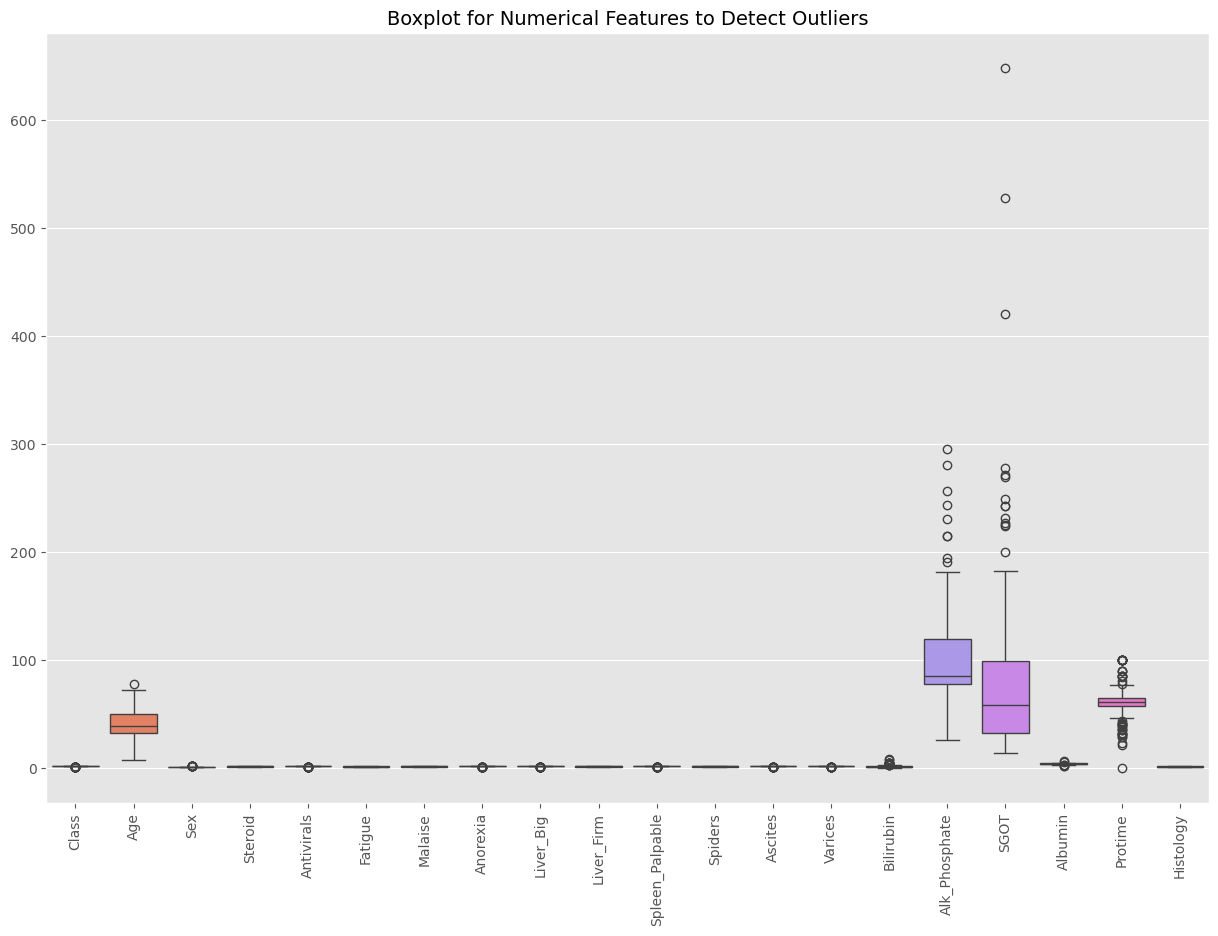

In [28]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df[numerical_features])
plt.title('Boxplot for Numerical Features to Detect Outliers', fontsize=14)
plt.xticks(rotation=90)
plt.show()

In [29]:
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df


In [30]:
features_to_cap = ['Bilirubin', 'Alk_Phosphate', 'SGOT', 'Protime']
for feature in features_to_cap:
    df = cap_outliers(df, feature)

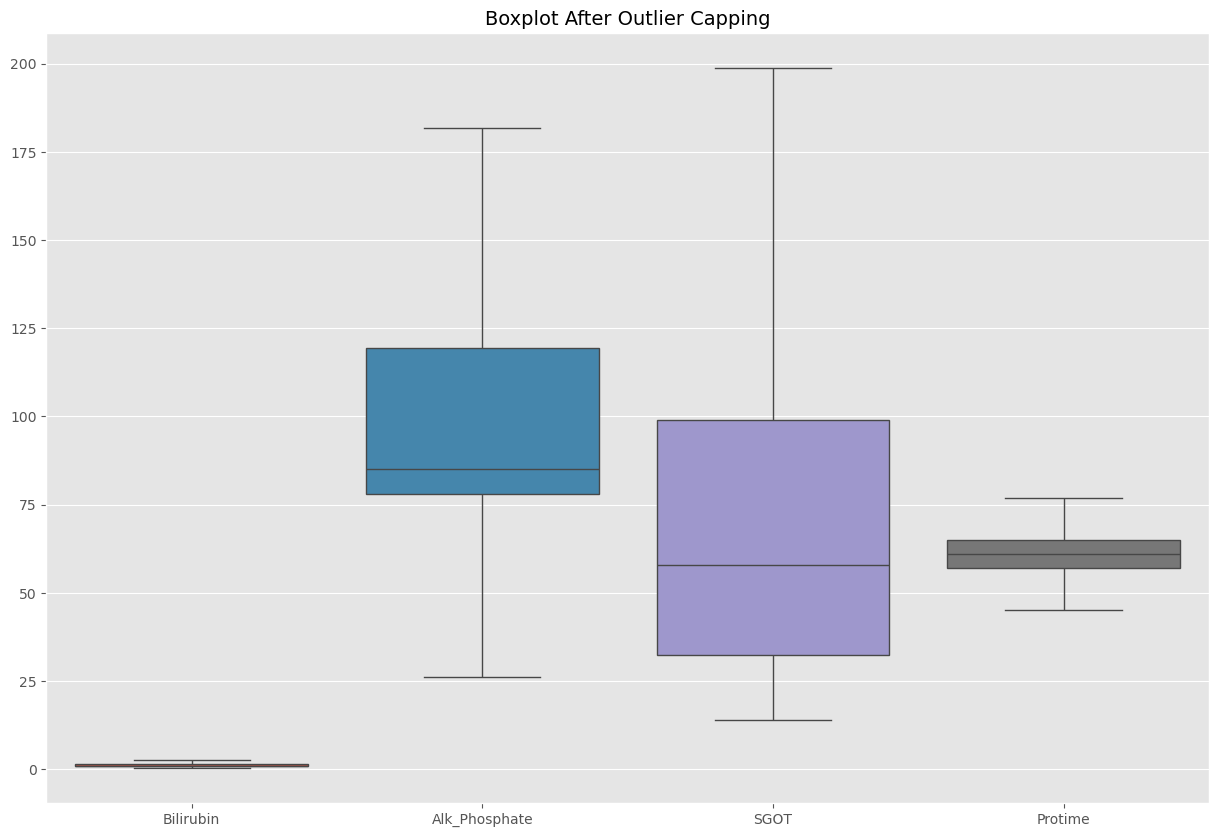

In [31]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df[features_to_cap])
plt.title('Boxplot After Outlier Capping', fontsize=14)
plt.show()

# Identify numerical and categorical feature columns in training data before feature scaling and encoding 

In [41]:
from sklearn.model_selection import train_test_split

X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Feature Scaling and Encoding

In [40]:
numerical_idx = X_train.select_dtypes(include='number').columns.tolist()
categorical_idx = X_train.select_dtypes(exclude='number').columns.tolist()


In [47]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# 3. Identify column types
numerical_idx = X_train.select_dtypes(include='number').columns.tolist()
categorical_idx = X_train.select_dtypes(exclude='number').columns.tolist()

# 4. Create transformers
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop=None, sparse_output=False, handle_unknown='ignore'))
])


# 5. Combine transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_idx),
        ('cat', categorical_transformer, categorical_idx)
    ])

# 6. Transform the data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# 7. Output the shapes
print("\n✅ Processed data shape:")
print("X_train_processed shape:", X_train_processed.shape)
print("X_test_processed shape:", X_test_processed.shape)



✅ Processed data shape:
X_train_processed shape: (124, 19)
X_test_processed shape: (31, 19)


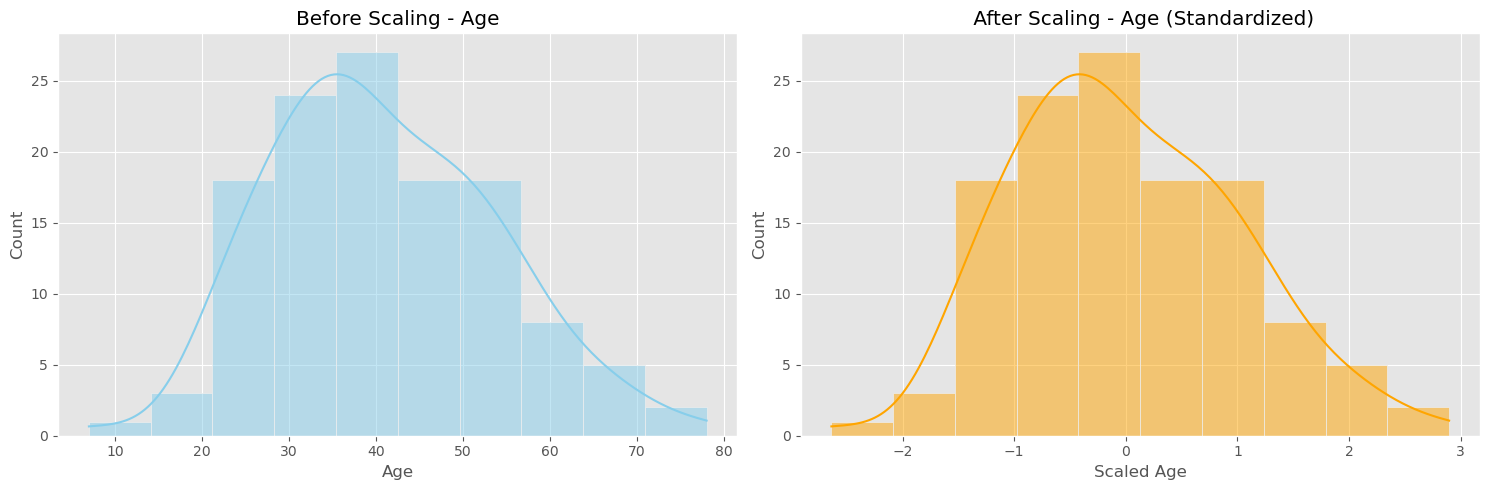

In [48]:
 import matplotlib.pyplot as plt
import seaborn as sns


feature_idx = numerical_idx.index('Age') 

before_scaling = X_train['Age']
after_scaling = X_train_processed[:, feature_idx]  


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))


sns.histplot(before_scaling, kde=True, ax=ax1, color='skyblue')
ax1.set_title('Before Scaling - Age')
ax1.set_xlabel('Age')


sns.histplot(after_scaling, kde=True, ax=ax2, color='orange')
ax2.set_title(' After Scaling - Age (Standardized)')
ax2.set_xlabel('Scaled Age')

plt.tight_layout()
plt.show()


# Final Dataset Summary and Visualization


Preprocessing Summary:
Original dataset shape: (155, 20)
Training set shape: (124, 19)
Testing set shape: (31, 19)
Processed training set shape: (124, 19)
Processed testing set shape: (31, 19)


C:\Users\nemo-\AppData\Local\Temp\ipykernel_21880\1004772914.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_with_target.values, y=correlation_with_target.index, palette='viridis')


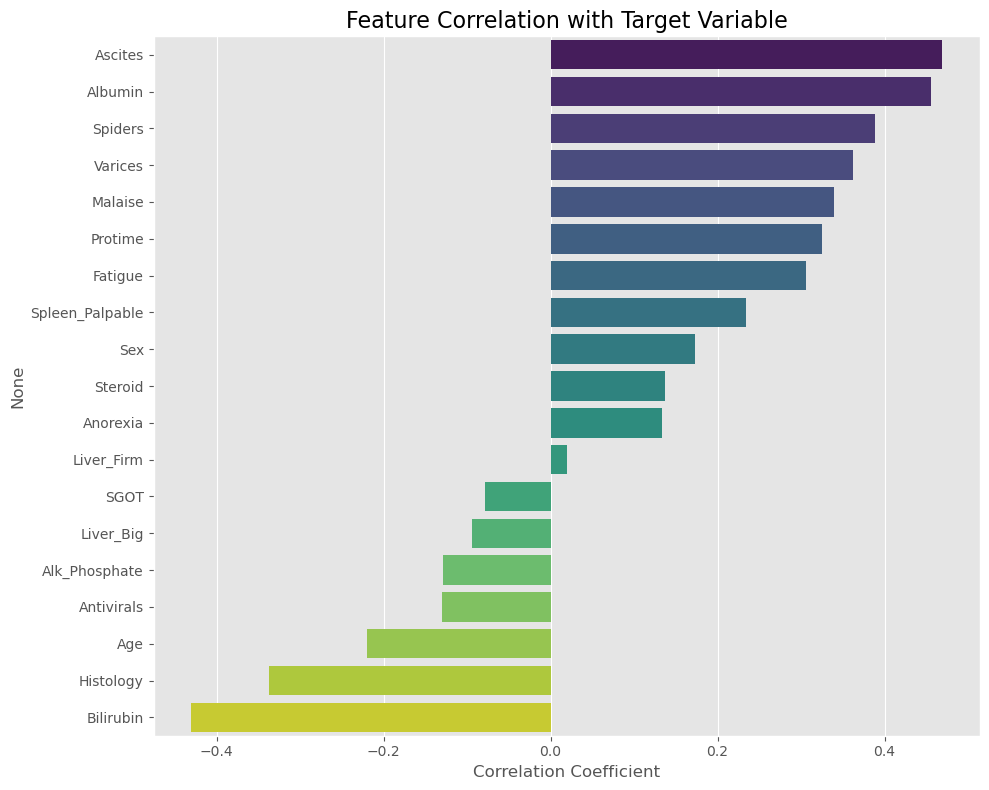


Preprocessing complete! Data is ready for modeling.


In [49]:
# Summary of preprocessing steps
print("\nPreprocessing Summary:")
print(f"Original dataset shape: {df.shape}")
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")
print(f"Processed training set shape: {X_train_processed.shape}")
print(f"Processed testing set shape: {X_test_processed.shape}")

# Visualize feature importance using a simple correlation with target
numeric_df = df.select_dtypes(include=[np.number])
correlation_with_target = numeric_df.corr()['Class'].sort_values(ascending=False)
correlation_with_target = correlation_with_target.drop('Class')

plt.figure(figsize=(10, 8))
sns.barplot(x=correlation_with_target.values, y=correlation_with_target.index, palette='viridis')
plt.title('Feature Correlation with Target Variable', fontsize=16)
plt.xlabel('Correlation Coefficient')
plt.tight_layout()
plt.show()


np.save('X_train_processed.npy', X_train_processed)
np.save('X_test_processed.npy', X_test_processed)
np.save('y_train.npy', y_train.values)
np.save('y_test.npy', y_test.values)

print("\nPreprocessing complete! Data is ready for modeling.")

# Decision Tree Model


In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

X_train_scaled = X_train_processed
X_test_scaled = X_test_processed

# Train Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)

# Predict
y_pred_dt = dt.predict(X_test_scaled)

# Evaluate
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_report = classification_report(y_test, y_pred_dt, output_dict=True)

# Convert classification report to DataFrame for display
dt_report_df = pd.DataFrame(dt_report).transpose()

print('✅ Decision Tree Accuracy:', dt_accuracy)
print(dt_report_df.head())


✅ Decision Tree Accuracy: 0.6129032258064516
              precision    recall  f1-score    support
1.0            0.142857  0.142857  0.142857   7.000000
2.0            0.750000  0.750000  0.750000  24.000000
accuracy       0.612903  0.612903  0.612903   0.612903
macro avg      0.446429  0.446429  0.446429  31.000000
weighted avg   0.612903  0.612903  0.612903  31.000000


# After fitting and training the model  


In [53]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)
y_train_pred_dt = dt.predict(X_train_scaled)
y_test_pred_dt = dt.predict(X_test_scaled)
print('Decision Tree Training Accuracy:', accuracy_score(y_train, y_train_pred_dt)*100)
print('Decision Tree Testing Accuracy:', accuracy_score(y_test, y_test_pred_dt)*100)

Decision Tree Training Accuracy: 100.0
Decision Tree Testing Accuracy: 61.29032258064516


# KNN Model

In [54]:
# KNN Model: Training, Testing, and Evaluation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Predict
y_pred_knn = knn.predict(X_test_scaled)

# Evaluate
knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_report = classification_report(y_test, y_pred_knn, output_dict=True)

# Convert classification report to DataFrame for display
knn_report_df = pd.DataFrame(knn_report).transpose()

print('KNN Accuracy:', knn_accuracy)
print(knn_report_df.head())

KNN Accuracy: 0.8064516129032258
              precision    recall  f1-score    support
1.0            0.600000  0.428571  0.500000   7.000000
2.0            0.846154  0.916667  0.880000  24.000000
accuracy       0.806452  0.806452  0.806452   0.806452
macro avg      0.723077  0.672619  0.690000  31.000000
weighted avg   0.790571  0.806452  0.794194  31.000000


# After fitting and training the model  


In [56]:
y_train_pred_knn = knn.predict(X_train_scaled)  
train_accuracy_knn = accuracy_score(y_train, y_train_pred_knn)  
test_accuracy_knn = accuracy_score(y_test, y_pred_knn)  
  
print('KNN Training Accuracy:', train_accuracy_knn*100)  
print('KNN Testing Accuracy:', test_accuracy_knn*100)  

KNN Training Accuracy: 91.12903225806451
KNN Testing Accuracy: 80.64516129032258


# SVM Model:

In [57]:
from sklearn.svm import SVC

# Train SVM
svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train_scaled, y_train)

# Predict
y_pred_svm = svm.predict(X_test_scaled)

# Evaluate
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_report = classification_report(y_test, y_pred_svm, output_dict=True)

# Convert classification report to DataFrame for display
svm_report_df = pd.DataFrame(svm_report).transpose()

print('SVM Accuracy:', svm_accuracy)
print(svm_report_df.head())

SVM Accuracy: 0.6774193548387096
              precision    recall  f1-score    support
1.0            0.285714  0.285714  0.285714   7.000000
2.0            0.791667  0.791667  0.791667  24.000000
accuracy       0.677419  0.677419  0.677419   0.677419
macro avg      0.538690  0.538690  0.538690  31.000000
weighted avg   0.677419  0.677419  0.677419  31.000000


# After fitting and training the model  

In [58]:
y_train_pred_svm = svm.predict(X_train_scaled)
train_accuracy_svm = accuracy_score(y_train, y_train_pred_svm)*100
test_accuracy_svm = accuracy_score(y_test, y_pred_svm)*100 
print('SVM Training Accuracy:', train_accuracy_svm)  
print('SVM Testing Accuracy:', test_accuracy_svm)  

SVM Training Accuracy: 96.7741935483871
SVM Testing Accuracy: 67.74193548387096


# Naive Bayes Model


In [59]:
from sklearn.naive_bayes import GaussianNB

# Train Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)

# Predict
y_pred_gnb = gnb.predict(X_test_scaled)

# Evaluate
gnb_accuracy = accuracy_score(y_test, y_pred_gnb)
gnb_report = classification_report(y_test, y_pred_gnb, output_dict=True)

# Convert classification report to DataFrame for display
gnb_report_df = pd.DataFrame(gnb_report).transpose()

print('Naive Bayes Accuracy:', gnb_accuracy)
print(gnb_report_df.head())

Naive Bayes Accuracy: 0.6774193548387096
              precision    recall  f1-score    support
1.0            0.400000  0.857143  0.545455   7.000000
2.0            0.937500  0.625000  0.750000  24.000000
accuracy       0.677419  0.677419  0.677419   0.677419
macro avg      0.668750  0.741071  0.647727  31.000000
weighted avg   0.816129  0.677419  0.703812  31.000000


# After fitting and training the model

In [60]:
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)
y_train_pred_nb = gnb.predict(X_train_scaled)
y_test_pred_nb = gnb.predict(X_test_scaled)
print('Naive Bayes Training Accuracy:', accuracy_score(y_train, y_train_pred_nb)*100)
print('Naive Bayes Testing Accuracy:', accuracy_score(y_test, y_test_pred_nb)*100)

Naive Bayes Training Accuracy: 66.12903225806451
Naive Bayes Testing Accuracy: 67.74193548387096


# Random Forest Model


In [ ]:
from sklearn.ensemble import RandomForestClassifier  
from sklearn.metrics import accuracy_score, classification_report  
  
# Train Random Forest  
rf = RandomForestClassifier(random_state=42)  
rf.fit(X_train_scaled, y_train)  
  
# Predict on the test set  
y_pred_rf = rf.predict(X_test_scaled)  
  
# Evaluate model performance  
rf_accuracy = accuracy_score(y_test, y_pred_rf)  
rf_report = classification_report(y_test, y_pred_rf, output_dict=True)  
  
# Convert classification report to DataFrame for display  
rf_report_df = pd.DataFrame(rf_report).transpose()  
  
print('✅ Random Forest Accuracy:', rf_accuracy)  
print(rf_report_df.head())  

✅ Random Forest Accuracy: 0.7096774193548387
              precision    recall  f1-score    support
1.0            0.250000  0.142857  0.181818   7.000000
2.0            0.777778  0.875000  0.823529  24.000000
accuracy       0.709677  0.709677  0.709677   0.709677
macro avg      0.513889  0.508929  0.502674  31.000000
weighted avg   0.658602  0.709677  0.678627  31.000000


# After fitting and training the model

In [88]:
# Train the Random Forest model (again, if needed, or reuse the above instance)  
rf = RandomForestClassifier(random_state=42)  
rf.fit(X_train_scaled, y_train)  
  
# Predict on both training and test sets  
y_train_pred_rf = rf.predict(X_train_scaled)  
y_test_pred_rf = rf.predict(X_test_scaled)  
  
print('Random Forest Training Accuracy:', accuracy_score(y_train, y_train_pred_rf) * 100)  
print('Random Forest Testing Accuracy:', accuracy_score(y_test, y_test_pred_rf) * 100)  

Random Forest Training Accuracy: 100.0
Random Forest Testing Accuracy: 70.96774193548387


# XG BOOST Model

In [90]:
import numpy as np  
from xgboost import XGBClassifier  
from sklearn.metrics import accuracy_score, classification_report  
import pandas as pd  
  
# Remap target variable: Convert labels 1 and 2 to 0 and 1  
y_train_adjusted = np.array(y_train) - 1  
y_test_adjusted = np.array(y_test) - 1  
  
# Train the XGBoost model with the adjusted labels  
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)  
xgb.fit(X_train_scaled, y_train_adjusted)  
  
# Predict on the test set and evaluate model  
y_pred_xgb = xgb.predict(X_test_scaled)  
xgb_accuracy = accuracy_score(y_test_adjusted, y_pred_xgb)  
xgb_report = classification_report(y_test_adjusted, y_pred_xgb, output_dict=True)  
xgb_report_df = pd.DataFrame(xgb_report).transpose()  
  
print("✅ XGBoost Accuracy:", xgb_accuracy)  
print(xgb_report_df.head())  

✅ XGBoost Accuracy: 0.6774193548387096
              precision    recall  f1-score    support
0.0            0.000000  0.000000  0.000000   7.000000
1.0            0.750000  0.875000  0.807692  24.000000
accuracy       0.677419  0.677419  0.677419   0.677419
macro avg      0.375000  0.437500  0.403846  31.000000
weighted avg   0.580645  0.677419  0.625310  31.000000


c:\Users\nemo-\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:44:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


# After fitting and training the model

In [92]:
import numpy as np  
from xgboost import XGBClassifier  
from sklearn.metrics import accuracy_score  
  
# Remap target variable for XGBoost  
y_train_adjusted = np.array(y_train) - 1  
y_test_adjusted = np.array(y_test) - 1  
  
# Train the XGBoost model  
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)  
xgb.fit(X_train_scaled, y_train_adjusted)  
  
# Predict on both training and test sets  
y_train_pred_xgb = xgb.predict(X_train_scaled)  
y_test_pred_xgb = xgb.predict(X_test_scaled)  
  
print('XGBoost Training Accuracy:', accuracy_score(y_train_adjusted, y_train_pred_xgb) * 100)  
print('XGBoost Testing Accuracy:', accuracy_score(y_test_adjusted, y_test_pred_xgb) * 100)  

XGBoost Training Accuracy: 100.0
XGBoost Testing Accuracy: 67.74193548387096


c:\Users\nemo-\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:48:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


# Training vs Testing Accuracy Comparison 

c:\Users\nemo-\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:51:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Model Accuracies:
           Model  Training Accuracy  Testing Accuracy
0            KNN          91.129032         80.645161
1            SVM          96.774194         67.741935
2    Naive Bayes          66.129032         67.741935
3  Decision Tree         100.000000         61.290323
4  Random Forest         100.000000         70.967742
5        XGBoost         100.000000         67.741935


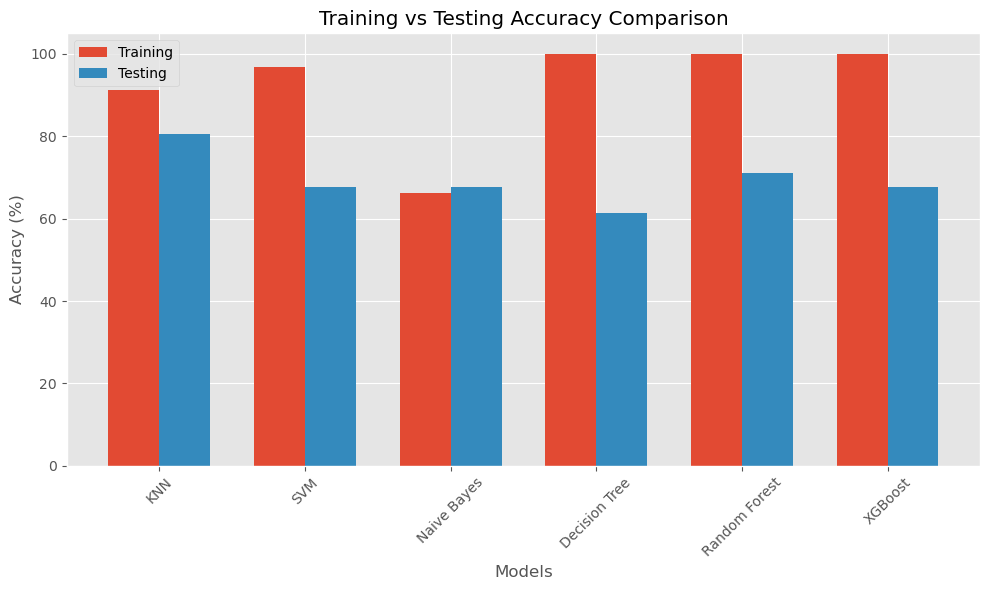

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Ensure that X_train_scaled, X_test_scaled, y_train, and y_test variables exist and are preprocessed properly.

# KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_train_pred_knn = knn.predict(X_train_scaled)
y_test_pred_knn = knn.predict(X_test_scaled)

# SVM
svm = SVC(kernel='rbf', probability=True)
svm.fit(X_train_scaled, y_train)
y_train_pred_svm = svm.predict(X_train_scaled)
y_test_pred_svm = svm.predict(X_test_scaled)

# Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)
y_train_pred_nb = gnb.predict(X_train_scaled)
y_test_pred_nb = gnb.predict(X_test_scaled)

# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)
y_train_pred_dt = dt.predict(X_train_scaled)
y_test_pred_dt = dt.predict(X_test_scaled)

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)
y_train_pred_rf = rf.predict(X_train_scaled)
y_test_pred_rf = rf.predict(X_test_scaled)

# XGBoost (remap target: subtract 1 so that labels become 0 and 1) 
import numpy as np

y_train_adjusted = np.array(y_train) - 1
ny_test_adjusted = np.array(y_test) - 1

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train_scaled, y_train_adjusted)

y_train_pred_xgb = xgb.predict(X_train_scaled)
y_test_pred_xgb = xgb.predict(X_test_scaled)

# Prepare results dataframe
models = ['KNN', 'SVM', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'XGBoost']

training_accuracies = [
    accuracy_score(y_train, y_train_pred_knn)*100,
    accuracy_score(y_train, y_train_pred_svm)*100,
    accuracy_score(y_train, y_train_pred_nb)*100,
    accuracy_score(y_train, y_train_pred_dt)*100,
    accuracy_score(y_train, y_train_pred_rf)*100,
    accuracy_score(y_train_adjusted, y_train_pred_xgb)*100  # using adjusted labels for xgb
]

testing_accuracies = [
    accuracy_score(y_test, y_test_pred_knn)*100,
    accuracy_score(y_test, y_test_pred_svm)*100,
    accuracy_score(y_test, y_test_pred_nb)*100,
    accuracy_score(y_test, y_test_pred_dt)*100,
    accuracy_score(y_test, y_test_pred_rf)*100,
    accuracy_score(y_test_adjusted, y_test_pred_xgb)*100  # using adjusted labels for xgb
]

results_df = pd.DataFrame({
    'Model': models,
    'Training Accuracy': training_accuracies,
    'Testing Accuracy': testing_accuracies
})

print("\
Model Accuracies:")
print(results_df)

# Plotting
plt.figure(figsize=(10, 6))
x = np.arange(len(results_df['Model']))
width = 0.35

plt.bar(x - width/2, results_df['Training Accuracy'], width, label='Training')
plt.bar(x + width/2, results_df['Testing Accuracy'], width, label='Testing')

plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Training vs Testing Accuracy Comparison')
plt.xticks(x, results_df['Model'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Preprocessed hepatites dataset for model training

In [65]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Assign column names
columns = ['Class', 'Age', 'Sex', 'Steroid', 'Antivirals', 'Fatigue', 'Malaise', 
          'Anorexia', 'Liver_Big', 'Liver_Firm', 'Spleen_Palpable', 'Spiders', 
          'Ascites', 'Varices', 'Bilirubin', 'Alk_Phosphate', 'Sgot', 'Albumin', 
          'Protime', 'Histology']
df.columns = columns

# Replace '?' with NaN
df = df.replace('?', np.nan)

# Convert columns to numeric
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Fill missing values with median for numeric columns
for col in df.columns:
    df[col] = df[col].fillna(df[col].median())

# Prepare features and target
X = df.drop('Class', axis=1)
y = df['Class']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data preprocessing completed. Ready for model tuning.")

Data preprocessing completed. Ready for model tuning.


# Tuned KNN Model using Grid Search for Hyperparameter Optimization

In [81]:
# KNN Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

print("=== K Nearest Neighborhood (KNN) Model Tuning ===")

# Define parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Perform GridSearchCV
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Print results
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

# Evaluate best model
best_knn = grid_search.best_estimator_
print("Training accuracy:", best_knn.score(X_train_scaled, y_train)*100)
print("Testing accuracy:", best_knn.score(X_test_scaled, y_test)*100)

=== K Nearest Neighborhood (KNN) Model Tuning ===
Best parameters: {'metric': 'euclidean', 'n_neighbors': 13, 'weights': 'uniform'}
Best cross-validation accuracy: 0.8873333333333333
Training accuracy: 89.51612903225806
Testing accuracy: 70.96774193548387


# Tuned SVM Model using Grid Search for Hyperparameter Optimization

In [80]:
# SVM Model Tuning
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

print("=== Support Vector Machine (SVM) Model Tuning ===")

# Define parameter grid for SVM
svm_param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Create and fit GridSearchCV
svm = SVC()
svm_grid = GridSearchCV(svm, svm_param_grid, cv=5, scoring='accuracy')
svm_grid.fit(X_train_scaled, y_train)

# Print results
print("\
Best Parameters:", svm_grid.best_params_)
print("Best Cross-validation Score:", svm_grid.best_score_)

# Get final model performance
best_svm = svm_grid.best_estimator_
print("Training Accuracy:", best_svm.score(X_train_scaled, y_train)*100)
print("Testing Accuracy:", best_svm.score(X_test_scaled, y_test)*100)

=== Support Vector Machine (SVM) Model Tuning ===
Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best Cross-validation Score: 0.8949999999999999
Training Accuracy: 96.7741935483871
Testing Accuracy: 67.74193548387096


# Tuned Naive Bayes Model using Grid Search for Hyperparameter Optimization

In [79]:
# Naive Bayes Model Tuning
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

print("=== Naive Bayes Model Tuning ===")

# Define parameter grid for Naive Bayes
nb_param_grid = {
    'var_smoothing': np.logspace(-10, -8, 20)
}

# Create and fit GridSearchCV
nb = GaussianNB()
nb_grid = GridSearchCV(nb, nb_param_grid, cv=5, scoring='accuracy')
nb_grid.fit(X_train_scaled, y_train)

# Print results
print("\
Best Parameters:", nb_grid.best_params_)
print("Best Cross-validation Score:", nb_grid.best_score_)

# Get final model performance
best_nb = nb_grid.best_estimator_
print("Training Accuracy:", best_nb.score(X_train_scaled, y_train)*100)
print("Testing Accuracy:", best_nb.score(X_test_scaled, y_test)*100)

=== Naive Bayes Model Tuning ===
Best Parameters: {'var_smoothing': 1e-08}
Best Cross-validation Score: 0.6453333333333333
Training Accuracy: 71.7741935483871
Testing Accuracy: 70.96774193548387


# Tuned Decision Tree Model using Grid Search for Hyperparameter Optimization

In [75]:
# Decision Tree Model Tuning
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

print("=== Decision Tree Model Tuning ===")

# Define parameter grid for Decision Tree
dt_param_grid = {
    'max_depth': [3, 5, 7, 9, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Create and fit GridSearchCV
dt = DecisionTreeClassifier(random_state=42)
dt_grid = GridSearchCV(dt, dt_param_grid, cv=5, scoring='accuracy')
dt_grid.fit(X_train_scaled, y_train)

# Print results
print("\
Best Parameters:", dt_grid.best_params_)
print("Best Cross-validation Score:", dt_grid.best_score_)

# Get final model performance
best_dt = dt_grid.best_estimator_
print("Training Accuracy:", best_dt.score(X_train_scaled, y_train)*100)
print("Testing Accuracy:", best_dt.score(X_test_scaled, y_test)*100)

=== Decision Tree Model Tuning ===
Best Parameters: {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Cross-validation Score: 0.8383333333333333
Training Accuracy: 100.0
Testing Accuracy: 61.29032258064516


# Tuned Random Forest model using Grid Search for Hyperparameter Optimization

In [94]:
from sklearn.ensemble import RandomForestClassifier  
from sklearn.model_selection import GridSearchCV  
  
print("=== Random Forest Model Tuning ===")  
  
# Define parameter grid for Random Forest  
rf_param_grid = {  
    'n_estimators': [100, 200, 300],  
    'max_depth': [3, 5, 7, None],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4]  
}  
  
# Create and fit GridSearchCV for Random Forest  
rf = RandomForestClassifier(random_state=42)  
rf_grid = GridSearchCV(rf, rf_param_grid, cv=5, scoring='accuracy')  
rf_grid.fit(X_train_scaled, y_train)  
  
# Print Random Forest tuning results  
print("Best Parameters:", rf_grid.best_params_)  
print("Best Cross-validation Score:", rf_grid.best_score_)  
best_rf = rf_grid.best_estimator_  
print("Training Accuracy:", best_rf.score(X_train_scaled, y_train) * 100)  
print("Testing Accuracy:", best_rf.score(X_test_scaled, y_test) * 100)  

=== Random Forest Model Tuning ===
Best Parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best Cross-validation Score: 0.8949999999999999
Training Accuracy: 93.54838709677419
Testing Accuracy: 80.64516129032258


# Tuned XG Boost using Grid Search for Hyperparameter Optimization

In [97]:
from xgboost import XGBClassifier  
from sklearn.model_selection import GridSearchCV  
import numpy as np  
  
print("=== XGBoost Model Tuning ===")  
  
# Adjusted target labels for XGBoost (assuming original y_train/y_test are [1,2])  
y_train_adjusted = np.array(y_train) - 1  
y_test_adjusted = np.array(y_test) - 1  
  
# Define parameter grid for XGBoost  
xgb_param_grid = {  
    'max_depth': [3, 5, 7],  
    'learning_rate': [0.01, 0.1, 0.2],  
    'n_estimators': [100, 200, 300],  
    'min_child_weight': [1, 3, 5]  
}  
  
# Create and fit GridSearchCV for XGBoost  
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)  
xgb_grid = GridSearchCV(xgb, xgb_param_grid, cv=5, scoring='accuracy')  
xgb_grid.fit(X_train_scaled, y_train_adjusted)  
  
# Print XGBoost tuning results  
print("Best Parameters:", xgb_grid.best_params_)  
print("Best Cross-validation Score:", xgb_grid.best_score_)  
best_xgb = xgb_grid.best_estimator_  
print("Training Accuracy:", best_xgb.score(X_train_scaled, y_train_adjusted) * 100)  
print("Testing Accuracy:", best_xgb.score(X_test_scaled, y_test_adjusted) * 100)  

=== XGBoost Model Tuning ===


c:\Users\nemo-\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:58:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\nemo-\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:58:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\nemo-\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:58:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\nemo-\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:58:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtr

Best Parameters: {'learning_rate': 0.01, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 200}
Best Cross-validation Score: 0.8870000000000001
Training Accuracy: 95.96774193548387
Testing Accuracy: 67.74193548387096


c:\Users\nemo-\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:58:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


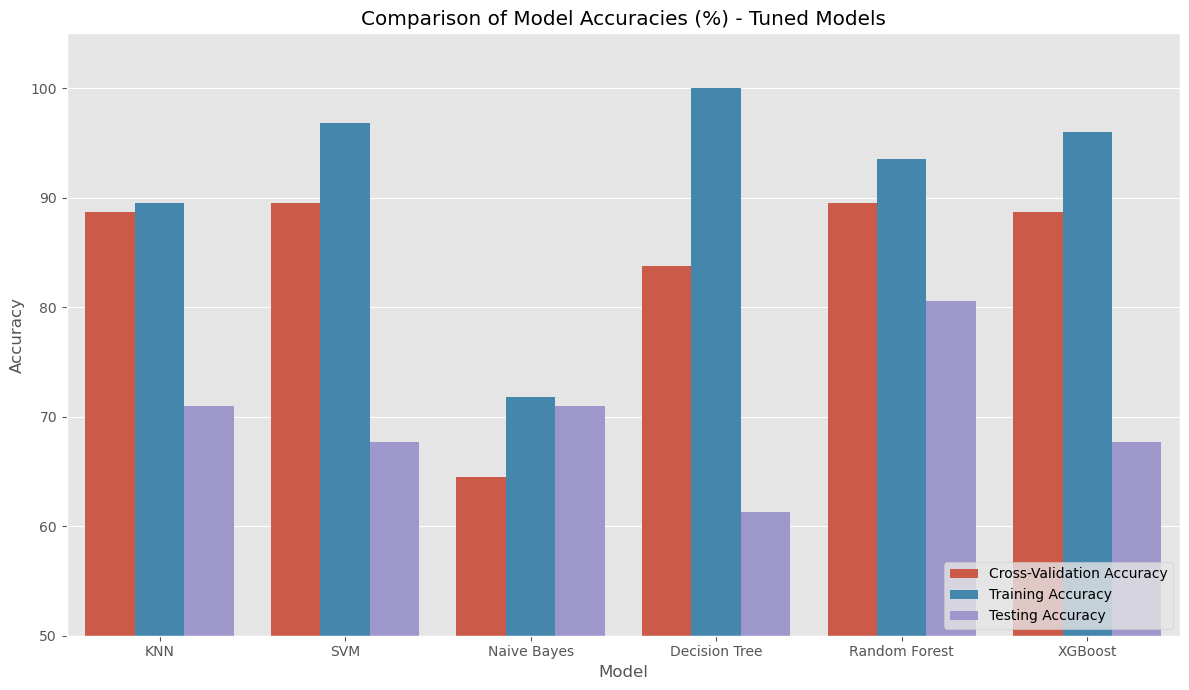

           Model  Cross-Validation Accuracy  Training Accuracy  Testing Accuracy
0            KNN                       88.7               89.5              71.0
1            SVM                       89.5               96.8              67.7
2    Naive Bayes                       64.5               71.8              71.0
3  Decision Tree                       83.8              100.0              61.3
4  Random Forest                       89.5               93.5              80.6
5        XGBoost                       88.7               96.0              67.7


In [103]:
# Prepare the results with percentages
data = {
    'Model': ['KNN', 'SVM', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'XGBoost'],
    'Cross-Validation Accuracy': [88.7, 89.5, 64.5, 83.8, 89.5, 88.7],
    'Training Accuracy': [89.5, 96.8, 71.8, 100.0, 93.5, 96.0],
    'Testing Accuracy': [71.0, 67.7, 71.0, 61.3, 80.6, 67.7]
}
results_df = pd.DataFrame(data)

# Melt the DataFrame for easier plotting
results_melted = pd.melt(results_df, id_vars='Model', 
                         value_vars=['Cross-Validation Accuracy', 'Training Accuracy', 'Testing Accuracy'],
                         var_name='Metric', value_name='Accuracy')

# Plot the results
plt.figure(figsize=(12, 7))
sns.barplot(data=results_melted, x='Model', y='Accuracy', hue='Metric')
plt.title('Comparison of Model Accuracies (%) - Tuned Models')
plt.ylim(50, 105)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

print(results_df)